# Session 7: Midterm Coding Test

```{contents}

```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Note**
Assignment aims primarily to test coding skills, but encourages students to try to create the best AI models possible.
- Problem 3 needs to use GPU Runtime.
- To limit access limits, use CPU Runtime when doing Problem 1, 2. When you're done, you can switch the Runtime to your GPU to continue working. When switching Runtime, you need to run the Google Drive connection code above again.
- In case of limit, you can share the notebook for 1 other gmail account, then use that account to continue the test.


## Problem 1:  Employee absenteeism forecast (3 pts)

`pandas` `plotly` `sklearn MLPClassifier` `GridSearchCV`

In this article, we will use the SVM model on IBM's Human Resource dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cols = ['SatisfactionIndex', 'LastEvaluationIndex', 'NumberOfProject', 'AverageMonthlyHour', 'YearInCompany','WorkingAccident', 'TurnOver','PromotionLastFiveYear','Department','SalaryLevel']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/HR_data.csv', header=0, names=cols)
df.head()

This dataset contains information about the current status of 1 employee and the result "Which employee quit at the end of this month". Quitting is `1`, no rest is `0`


|Column name| meaning|
|---|---|
|SatisfactionIndex| Employee satisfaction index
|LastEvaluationIndex| Last employee review score
|NumberOfProject| Number of projects employees are participating in
|AverageMonthlyHour| Average monthly working hours
|YearInCompany| Years worked at the company
|WorkingAccident| Occurence of accident when working for the company
|PromotionLastFiveYear| Number of resignations during the last 5 year
|TurnOver| quit job or not
|Department| Current Department
|SalaryLevel| The level of Salary


### Data Analysis (1 pt)

First we need to explore the data of the columns

In [ ]:
df.info()

Observing the above results, we can see:

- Columns `Department` `SalaryLevel` has the datatype `object` → likely to be Categorical Variable.
- Column `TurnOver` has the datatype integer `int64` → from dataset description $\rightarrow$ great possibility that there will be 2 values that are: `0` or `1`
- columns `SatisfactionIndex` `LastEvaluationIndex`has the datatype `float64` → great possibility that values ranges `from 0 to 1`   
- The remaining columns have an integer data type `int64` → likely to be ascending integers
- No columns with empty values (14999 entries, 14999 non-null)



In [ ]:
import plotly.express as px
import plotly.graph_objects as go

#### TODO 1

Use the `plotly` library to plot a column chart that counts the number of unique values in 3 columns `Department` `SalaryLevel` `TurnOver`

In [ ]:
# Your Solution

For columns with numeric value types, we can draw `boxplot` or use `df.describe()` to determine the average of their range of values and see if there are any outliers. For example, if the whole company has only 1 long-term employee, the value of that employee's column `YearInCompany` may be very different from other employees.



In [ ]:
cols = [
    "SatisfactionIndex",
    "LastEvaluationIndex",
    "NumberOfProject",
    "AverageMonthlyHour",
    "YearInCompany",
    "WorkingAccident",
    "PromotionLastFiveYear"
]

df[cols].describe()

,SatisfactionIndex,LastEvaluationIndex,NumberOfProject,AverageMonthlyHour,YearInCompany,WorkingAccident,PromotionLastFiveYear
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


From the above results, we see:
- `WorkingAccident` `PromotionLastFiveYear` contains only 2 values, `0` or `1`
- `SatisfactionIndex` `LastEvaluationIndex` has values ranging from `0` to `1`
- `NumberOfProject` has values ranging from `2` to `7`
- `YearInCompany` ranges in value from `2` to `10`
- `AverageMonthlyHour` ranges from `96` to `310`


We can:
- Graph the count for `WorkingAccident` `PromotionLastFiveYear`
- The remaining columns, we can draw `boxplot`, but instead of drawing multiple graphs, we can group columns with close values together to plot:
  - `SatisfactionIndex` `LastEvaluationIndex`
  - `NumberOfProject` `YearInCompany`
  - `AverageMonthlyHour`

In [ ]:
px.histogram(df.WorkingAccident, color=df.WorkingAccident, title="Working Accident")

In [ ]:
px.histogram(df.PromotionLastFiveYear, color=df.PromotionLastFiveYear, title="Promotion Last Five Year")

In [ ]:
px.box(df[['SatisfactionIndex', 'LastEvaluationIndex']])

In [ ]:
px.box(df[["NumberOfProject", "YearInCompany"]])

In [ ]:
px.box(df.AverageMonthlyHour)

#### TODO 2

Use the `plotly` library to plot a `pie chart` that counts the number of unique values in 2 columns `WorkingAccident` `PromotionLastFiveYear`

In [ ]:
# YOUR SOLUTION

To draw a boxplot for multiple columns at once, we need to transform the current `DataFrame` a bit, check out the example below

In [ ]:
data = {
    'Column1': [1, 2, 3, 4, 5],
    'Column2': [6, 7, 8, 9, 10],
    'Column3': [11, 12, 13, 14, 15],
    'Column4': [16, 17, 18, 19, 20],
    'Column5': [21, 22, 23, 24, 25]
}

# This dataframe is similar to our employee dataframe with columns containing Continuous type data
df_test = pd.DataFrame(data)
df_test.head()

In [ ]:
'''
Use the melt method to transform the dataframe
  -> new dataframe has only 2 columns left
    1 column contains names of old columns, 1 column contains values
From this new dataframe, we can draw Boxplot
'''

df_melted = pd.melt(df_test, value_vars=df_test.columns, var_name='Column', value_name='Value')
df_melted.head()

Do the same with our DataFrame

In [ ]:
# list of columns need transformed
cols = [
    "SatisfactionIndex",
    "LastEvaluationIndex",
]

df_boxplot = pd.melt(df, value_vars=cols, var_name='Column', value_name='Value')
df_boxplot

In [ ]:
# draw the boxplot
fig = px.box(df_boxplot, x='Column', y='Value', color="Column")
fig.show()

In [ ]:
# list of columns need transformed
cols = [
    "NumberOfProject",
    "YearInCompany",
]

df_boxplot = pd.melt(df, value_vars=cols, var_name='Column', value_name='Value')
fig = px.box(df_boxplot, x='Column', y='Value', color="Column")
fig.show()

In [ ]:
fig = px.box(df, y='AverageMonthlyHour')
fig.show()

Thinking about it for a moment, for this problem, we see that whether employees quit or not will have a lot to do with their satisfaction index in the process of working. The satisfaction index relates to other things.

So is there a way to check the correlation between the columns in the DataFrame?

We can use the `df.corr()` function to automatically calculate the correlation between columns. Then use a `heatmap` to plot the result
- A positive number means that 2 columns have a positive correlation (max = 1)
- Negative number means 2 columns with an inverse correlation (max = -1)

In [ ]:
fig = px.imshow(df.corr(numeric_only=True), color_continuous_scale="blackbody")
fig.show()

Observing the above `heatmap`, we see:
- `AverageMonthlyHour` is highly correlated with `NumberOfProject`
  - Reasonable, right? If you participate in many projects, the average working hours are also high.
- Similarly we have a high `SatisfactionIndex` **inverse correlation** with `TurnOver`
  - Another reasonable 1 point, high `SatisfactionIndex`, low `TurnOver`, the more satisfied it is, the harder it is to quit

Looking at this correlation can help us understand a lot more about the data:
- If 2 features are highly correlated (0.8, 0.9) we can combine those 2 characteristics into 1 (average, for example).
- Assuming we have 1 AI model that very accurately predicts which employee will quit, we can rely on the correlation of the `SatisfactionIndex` with other columns to decide what to do to retain that employee (e.g. if the `SatisfactionIndex` is highly correlated with the `SalaryLevel` → raise wages to retain employees)

There is still 1 problem we need to solve, which is to encode categorical values in 2 columns `Department` `SalaryLevel`

The values of `SalaryLevel` are actually of the form **Ordinal** (category and ordered data: $\text{low} < \text{medium} < \text{high}$)

To convert the above columns to numbers, we **do not need to apply OneHotEncoding** but simply map them to `0` `1` `2`

#### TODO 3

Convert values `low` `medium` `high` in column `SalaryLevel` into `0` `1` `2`

In [ ]:
# YOUR SOLUTION

After the conversion is complete, we can redraw the `heatmap` to see if "High salaries are enough to retain employees?"

In [ ]:
fig = px.imshow(df.corr(numeric_only=True), color_continuous_scale="blackbody")
fig.show()

#### Your answer

#### TODO 4

There's a lot more that can be analyzed from this dataset. It's your turn

In [ ]:
# YOUR SOLUTION
# CODE AND ALSO WRITE DOWN YOUR LOGIC TO SHOW YOUR ANALYTICAL THOUGHT PROCESS
# ALSO CONCLUDE WHAT IS THE SOLUTION FOR IBM AFTER YOUR DATA ANALYSIS

Before training the model, we will use the command `pd.get_dummies()` to convert all columns with non-numeric data to One Hot (so you need to be careful to perform other encoding methods before calling `pd.get_dummies()`, in this tutorial we converted the column `SalaryLevel` first)

See the result of the `pd.get_dummies()` command below

In [ ]:
pd.get_dummies(df)

We see that the values in the `Department` column are converted to the `Deparment_xxx` columns to contain the One Hot Vector

We will assign this new DataFrame back to the old variable `df`

In [ ]:
df = pd.get_dummies(df)
df.head()

To create `x` `y` from DataFrame do the following:
- `x` Use the `drop()` function to remove the `TurnOver` column, then convert this DataFrame to the numpy array using the command `.values.copy()` (`copy()` so that the value of `df` is not changed when we change `x`)
- `y` Use `.values.copy()` command on the `TurnOver` column

In [ ]:
x = df.drop(columns="TurnOver").values.copy()
y = df["TurnOver"].values.copy()

### Train the model (2pts)

#### TODO 5

Split `x`, `y` into 2 episodes: Train and Test according to the following parameters:
- `random_state=42`
- Test set accounts for `20%`
- Have a shuffle and use Stratified Split

Read about `class MLPClassifier` of `sklearn` at [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). You will find that initializing this class needs to pass a lot of parameters, most of them you have learned through using Tensorflow. Let's train sklearn's MLP model to solve this problem.
- How to declare the number of layers and the number of units in each layer: `hidden_layer_sizes=tuple` where the number of elements of `tuple` is the number of layers, while the value of each element represents the number of units at the corresponding layer
Try applying `GridSearchCV` on `learning_rate_init` and `hidden_layer_sizes`
- After training the model, you can retrieve the value history of the Loss Function (similar to the `history` variable in Tensorflow) with the command `model.loss_curve_` (if using GridSearchCV, you need to call this command from the best model)

Draw confusion matrix and classification report on Test file



In [ ]:
# YOUR SOLUTION

## Problem 2: Data Clustering (3 pts)

`PCA` `KMeans` `Image Embeddings`

In folder `MidTerm_Problem 2`, contains the following files:
- `Images.zip` dataset consists of 961 images under 2 labels:
  - `1` (car)
  - `0` (not a car)
- `dataset.csv` label information of each image
- `pretrained.pkl` AI model capable of extracting characteristics of any 1 image.
- `test_1.jpg` test image to run the sample code below

Below is sample code to initialize the Pretrained Model and extract the characteristics of any image
- You need to correct the path to the `pretrained.pkl` and `test_1.jpg` files

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

class PretrainedModel:
    def __init__(self):
        self.model = torch.load("/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/MidTerm_Problem2/pretrained.pkl")
        self.model.eval()
        self.transformer =  transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            ),
        ])

    def get_feature(self, pil_image):
        image_tensor = self.transformer(pil_image)
        image_tensor = image_tensor.unsqueeze(0)
        with torch.no_grad():
            feature = self.model(image_tensor).squeeze().numpy()
        return feature

In [ ]:
# init
pretrained = PretrainedModel()

# get feature from a PIL Image
pil_img = Image.open("/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/MidTerm_Problem2/test_1.jpg").convert("RGB")
feature = pretrained.get_feature(pil_img)

print(feature.shape)
print(type(feature))

Here's the code to unzip the `images.zip` file to Colab's hard drive at `/content/images`

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/MidTerm_Problem2/images.zip" -d "/content/"

Read the csv file containing label information

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/MidTerm_Problem2/dataset.csv")
df.head()

In [ ]:
df.label.value_counts()

Code to read the entire images and labels into 2 variables `x` `y`

In [ ]:
import os
from tqdm.notebook import tqdm
import numpy as np

y = df["label"].values            # retrieve data from the label column
image_names = df["image"].values  # retrieve the data from image colum (names of images)
x = []                            # embedding vector

for name in tqdm(image_names, total=image_names.shape[0]):
  image_path = os.path.join("/content/images", name)
  pil_img = Image.open(image_path).convert("RGB")
  feature = pretrained.get_feature(pil_img)
  x.append(feature)

x = np.array(x)

In [ ]:
x.shape, y.shape

To find out which image the embedding at position `i` is, we use the following code

In [ ]:
index = 123 # sample index
print(df[df.index == index]["image"].values[0]) # 1 index should take out the first element

In [ ]:
indices = [0, 10, 100]
print(df[df.index.isin(indices)]["image"].values)

In the work section below, you will need to draw photos

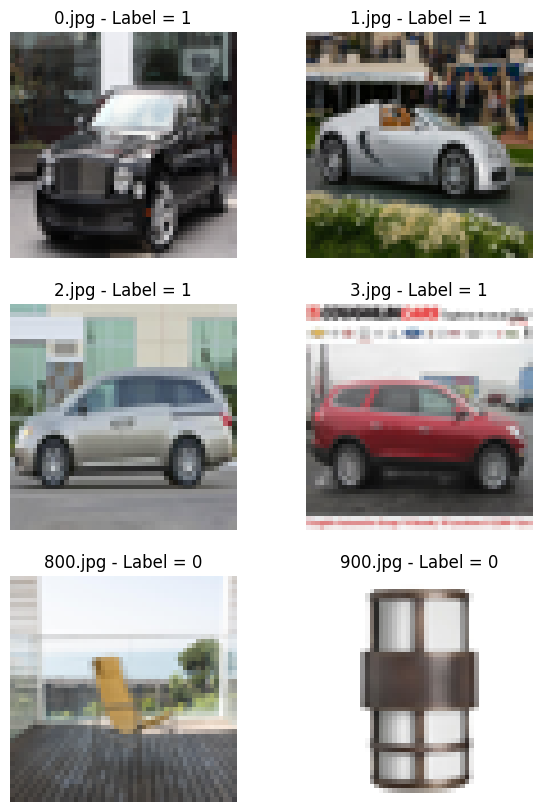

In [ ]:
'''
Guildance:
- convert names into paths
- Read photos, resize about 50x50 pixels to draw (original photos are too large)
- Convert into numpy array

- 6 photos -> a plot with 3 rows of 2 columns (rows, cols, and figsize is freely customized)
- Fiter to get the label
- show image and set title image_name-label
'''


import matplotlib.pyplot as plt


test_names = ["0.jpg", "1.jpg", "2.jpg", "3.jpg", "800.jpg", "900.jpg"]
test_paths = [os.path.join("/content/images", name) for name in test_names]
test_images = [np.array(Image.open(path).resize((50, 50))) for path in test_paths]


fig, axes = plt.subplots(3, 2, figsize=(7, 10))
for i, ax in enumerate(axes.flat):
  ax.grid('off')
  ax.axis('off')
  ax.imshow(test_images[i])
  label = df[df["image"] == test_names[i]]["label"].values[0]
  ax.set_title(f"{test_names[i]} - Label = {label}")

#### TODO 6 (1.5 pts)

Let:
- Apply PCA to reduce dimension to 3 (before PCA you must do what?)
- Display how data is distributed in 3D space (does the data have a clear separation between labels?)



In [ ]:
# YOUR SOLUTION

The actual data includes the following labels (more than 3 labels)
- Angle view of the car
- Many different vehicles
- Non-vehicle images of various subclasses

Instead of looking at each image, there is 1 way to use the `KMeans` model to cluster the embedding (before PCA). If embedding is good, KMeans models will be able to group photos by hidden labels.



#### TODO 7 (1.5 pts)

Use the `KMeans` model of `sklearn` to cluster embedding (try different `k`)

After clustering, at each cluster, draw several images of that cluster to see if you can find the hidden label of the dataset

In [ ]:
# YOUR SOLUTION

## Problem 3: Sentiment Analysis (4 pts)

`MLP`

In this Problem, we will try to use the Pretrained Language Model to classify emotions for English comments. Here's how:
Use the Pretrained Language Model to create embedding for comments
- From the above embedding set, MLP model training to classify emotions

First, we need to install 1 more library

In [ ]:
!pip install -qq pyyaml==5.4.1
!pip install -qq transformers
!pip install -qq datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 6.2 MB/s eta 0:00:00


### Prepare the dataset

The code below will generate 3 DataFrames representing the set of Train, Validation, Test.

Labels of comment sentences are stored in the variable `label_names`

In [ ]:
from datasets import load_dataset
import pandas as pd

emotion_ds = load_dataset("emotion")
emotion_ds.set_format(type="pandas")

df_train = emotion_ds["train"][:]
df_val = emotion_ds["validation"][:]
df_test = emotion_ds["test"][:]

label_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

train_labels = df_train["label"].values[:].tolist()
train_label_names = [label_names[label] for label in train_labels]
df_train["label_name"] = train_label_names

val_labels = df_val["label"].values[:].tolist()
val_label_names = [label_names[label] for label in val_labels]
df_val["label_name"] = val_label_names

test_labels = df_test["label"].values[:].tolist()
test_label_names = [label_names[label] for label in test_labels]
df_test["label_name"] = test_label_names

Explore the dataset

In [ ]:
df_train.head()

In [ ]:
for label in label_names:
  print("Label:", label)
  texts = df_train[df_train["label_name"] == label]["text"].values[:5]
  for text in texts:
    print(text)
  print("-" * 30)

In [ ]:
print("Train Set")
print(df_train["label_name"].value_counts())
print("Val Set")
print(df_val["label_name"].value_counts())
print("Test Set")
print(df_test["label_name"].value_counts())

### Create Embedding

Use `AutoTokenizer` from `transformers` library

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
encoded_train_dict = tokenizer(
    df_train['text'].values.tolist(),
    max_length=tokenizer.model_max_length,
    truncation=True,
    padding=True,
    return_tensors="pt" #np #tf
)

encoded_val_dict = tokenizer(
    df_val['text'].values.tolist(),
    max_length=tokenizer.model_max_length,
    truncation=True,
    padding=True,
    return_tensors="pt"
)

encoded_test_dict = tokenizer(
    df_test['text'].values.tolist(),
    max_length=tokenizer.model_max_length,
    truncation=True,
    padding=True,
    return_tensors="pt"
)

In [ ]:
from transformers import AutoModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = AutoModel.from_pretrained("distilbert-base-uncased").to(device)


![](https://www.azquotes.com/picture-quotes/quote-success-requires-both-urgency-and-patience-be-urgent-about-making-the-effort-and-patient-ralph-marston-124-20-15.jpg)

In [ ]:
from tqdm.notebook import tqdm
import numpy as np

def extract_feature(data_dict, device):
  features = []
  count = 0
  with torch.no_grad():
    for input_id, mask in tqdm(zip(data_dict["input_ids"], data_dict["attention_mask"]), total=len(data_dict["input_ids"])):
      input_id = input_id.reshape(1,-1)
      mask = mask.reshape(1,-1)
      out = model(input_id.to(device), mask.to(device)).last_hidden_state.detach()[:,0].squeeze().cpu().numpy()
      features.append(out)
  return np.array(features)

print("Train Set")
train_features = extract_feature(encoded_train_dict, device)
print("Val Set")
val_features = extract_feature(encoded_val_dict, device)
print("Test Set")
test_features = extract_feature(encoded_test_dict, device)

In [ ]:
train_labels = df_train["label"].values.copy()
val_labels = df_val["label"].values.copy()
test_labels = df_test["label"].values.copy()

In [ ]:
print("Train Set:", train_features.shape, train_labels.shape)
print("Val Set:", val_features.shape, val_labels.shape)
print("Test Set:", test_features.shape, test_labels.shape)

### Train the model

#### TODO 8

Train the MLP Tensorflow model on the above dataset. It would be nearly impossible to create a good model on this dataset, however:
Try to make the training as stable as possible (no overfit on the validation set) when train 100 epochs (accuracy on train should > 80%)

Print out Confusion Matrix and Classification Report on Test file


In [ ]:
# YOUR SOLUTION

In [ ]:
# Visualize metrics
import math
import plotly.express as px
import plotly.graph_objects as go
def plot(history, chart_title):
  epochs = np.arange(len(history.history["loss"]))

  train_loss = px.line(x=epochs, y=history.history["loss"]).data[0]
  train_loss["name"] = "Train Loss"
  train_loss["showlegend"] = True

  val_loss = px.line(x=epochs, y=history.history["val_loss"]).data[0]
  val_loss["line"]["color"] = "#00ff00"
  val_loss["name"] = "Val Loss"
  val_loss["showlegend"] = True

  train_accuracy = px.line(x=epochs, y=history.history["accuracy"]).data[0]
  train_accuracy["line"]["dash"] = "dot"
  train_accuracy["name"] = "Train Accuracy"
  train_accuracy["showlegend"] = True

  val_accuracy = px.line(x=epochs, y=history.history["val_accuracy"]).data[0]
  val_accuracy["line"]["color"] = "#00ff00"
  val_accuracy["line"]["dash"] = "dot"
  val_accuracy["name"] = "Val Accuracy"
  val_accuracy["showlegend"] = True

  fig = go.Figure(data=[train_loss, val_loss, train_accuracy, val_accuracy])
  fig.update_layout(
      title = chart_title,
      xaxis_title = "Epoch",
      yaxis_title = "Value"
  )
  fig.show()

In [ ]:
plot(history, chart_title="Loss vs Accuracy")